# Ejercicio 12

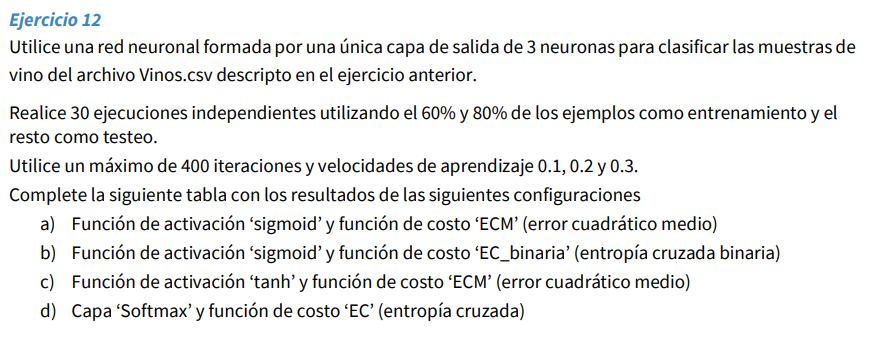

# Lectura de datos e importe de librerias

In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [4]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

nombre_archivo = DATOS_DIR + 'Vinos.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, sep=';')

df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df['Class'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
Y = df['Class']
X = df.drop(columns=['Class'])

In [8]:
Y = pd.get_dummies(Y)
Y

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [9]:
X = np.array(X)
Y = np.array(Y)

### Normalizacion de datos

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Entrenamiento del modelo

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from ClassRNMulticlase import RNMulticlase

In [14]:
CANT_EJECUCIONES = 30
CANT_PORCENTAJES = 2
porcentajes_entrenamiento = [0.6 , 0.8]
tasa = 0.3
resultados = []

for i in range(CANT_PORCENTAJES): #por cada porcentaje de entrenamiento realizo 30 ejecuciones independientes
    #inicializp donde voy a guardar las nmetricas
    ejemplos_correctos_train = []
    ejemplos_correctos_test = []
    cant_iteraciones = []

    #POR CADA PORCENTAJE
    for p in range (CANT_EJECUCIONES):
        #divido en entrenamiento y testeo
        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=porcentajes_entrenamiento[i], random_state=None)
        #modelo
        neurona = RNMulticlase(alpha=tasa, n_iter=400, cotaE=10e-07, FUN='sigmoid', COSTO='ECM', random_state=None)
        #entrenamiento
        neurona.fit(X_train, y_train)
        #predicciones
        y_pred_train = neurona.predict(X_train)
        y_pred_test = neurona.predict(X_test)
        #calculo los ejemplos que estan correctamenre clasificados
        correct_train = np.sum(y_pred_train == y_train)
        correct_test = np.sum(y_pred_test == y_test)
        #guardo los resultados de las predicciones correctas
        ejemplos_correctos_train.append(correct_train)
        ejemplos_correctos_test.append(correct_test)
        #cuento la cantidad de iteraciones
        cant_iteraciones.append(len(neurona.errors_))
    
    prom_train = np.mean(ejemplos_correctos_train)
    prom_test = np.mean(ejemplos_correctos_test)
    prom_iter = np.mean(cant_iteraciones)
    desv_iter = np.std(cant_iteraciones)

    #por cada porcentaje me guardo los resultados
    resultados.append({
        'Porcentaje': porcentajes_entrenamiento[i],
        'Tasa' : tasa,
        'Promedio Correctos Train': prom_train,
        'Promedio Correctos Test': prom_test,
        'Promedio Iteraciones': prom_iter,
        'Desviación Iteraciones': desv_iter

    })


for r in resultados:
    print(f"Porcentaje: {r['Porcentaje']}, Tasa: {r['Tasa']}")
    print(f"  Promedio Correctos Train: {r['Promedio Correctos Train']}")
    print(f"  Promedio Correctos Test: {r['Promedio Correctos Test']}")
    print(f"  Promedio Iteraciones: {r['Promedio Iteraciones']} +/- {r['Desviación Iteraciones']}")
    print()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_5716\965210244.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_train = np.sum(y_pred_train == y_train)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_5716\965210244.py:26: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_test = np.sum(y_pred_test == y_test)


Porcentaje: 0.6, Tasa: 0.3
  Promedio Correctos Train: 0.0
  Promedio Correctos Test: 0.0
  Promedio Iteraciones: 400.0 +/- 0.0

Porcentaje: 0.8, Tasa: 0.3
  Promedio Correctos Train: 0.0
  Promedio Correctos Test: 0.0
  Promedio Iteraciones: 400.0 +/- 0.0

